In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

# Generating Dataset

In [2]:
def synthetic_data(w, b, num_examples): #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.6824, -1.2763]) 
label: tensor([7.1777])


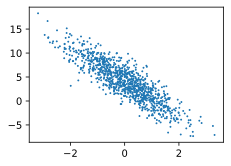

In [4]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1)

# Reading the Dataset

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2372,  0.8967],
        [-0.6893, -2.4462],
        [ 0.8600, -0.3237],
        [-1.4458,  0.4159],
        [-1.2258, -0.3182],
        [ 0.6037,  0.0050],
        [-0.4444, -2.2131],
        [ 0.2493,  0.5595],
        [ 1.1276,  0.0495],
        [ 0.8042,  0.4807]]) 
 tensor([[ 0.6775],
        [11.1442],
        [ 7.0302],
        [-0.1102],
        [ 2.8330],
        [ 5.3890],
        [10.8368],
        [ 2.7768],
        [ 6.3113],
        [ 4.1797]])


# Initialize Model Parameters

In [7]:
w = torch.normal(0, 0.01,size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Defining the Model

In [8]:
def linreg(X, w, b): #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

# Defining the Loss Function

In [9]:
def squared_loss(y_hat,y): #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# Defining the Optimization Algorithm

In [10]:
def sgd(params, lr, batch_size): #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

# Training

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.040532
epoch 2, loss 0.000155
epoch 3, loss 0.000051


In [12]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-3.2091e-04, -4.6492e-05], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0009], grad_fn=<RsubBackward1>)
